In [4]:
import data_loader
import numpy as np
import keras
import pickle
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.utils import np_utils
from keras.optimizers import SGD, Adam, RMSprop

Using TensorFlow backend.


### Load the original data

In [5]:
img_dir_path = 'origin/images'
label_file_path = 'origin/data/legend.csv'
valid_rate = 0.1

train_file_paths, \
train_labels, \
valid_file_paths, \
valid_labels, \
test_file_paths, \
test_labels, \
label_dict = data_loader.load_dataset(img_dir_path, label_file_path, valid_rate)

print('train_images size is: ', len(train_file_paths))
print('valid_images size is: ', len(valid_file_paths))
print('test_images size is: ', len(test_file_paths))
print('label_dict size is: ', len(label_dict))
print(label_dict.keys())

train_images size is:  11086
valid_images size is:  1226
test_images size is:  1378
label_dict size is:  8
dict_keys(['anger', 'sadness', 'disgust', 'neutral', 'happiness', 'contempt', 'surprise', 'fear'])


[206, 218, 170, 5565, 4617, 0, 299, 11]


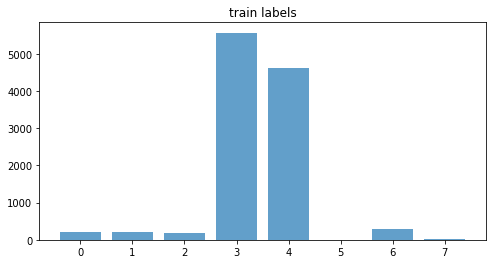

[22, 24, 18, 617, 511, 0, 33, 1]


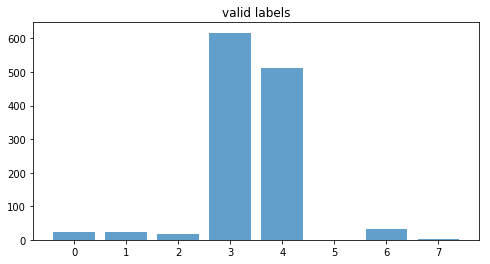

[24, 26, 20, 686, 568, 9, 36, 9]


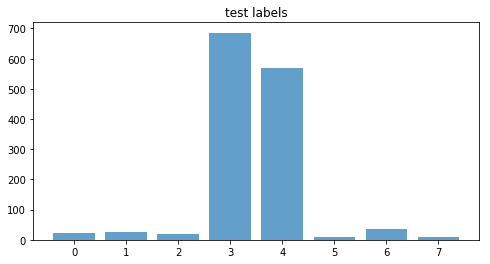

In [6]:
def count_nums(labels, types):
    count = [0, 0, 0, 0, 0, 0, 0, 0]
    for label in labels:
        count[label] += 1
    print(count)
    plt.figure(figsize=(8,4))
    plt.bar(range(len(count)), count, alpha=0.7) 
    plt.title(types + " labels") 
    plt.show()
    
count_nums(train_labels, "train")
count_nums(valid_labels, "valid")
count_nums(test_labels, "test")

### Load the extracted features by CNN

In [7]:
with open("extract/x_train_norm", "rb") as f:
    x_train = np.array(pickle.load(f))

with open("extract/x_valid_norm", "rb") as f:
    x_valid = np.array(pickle.load(f))

with open("extract/x_test_norm", "rb") as f:
    x_test = np.array(pickle.load(f))

y_train = np_utils.to_categorical(train_labels, 8)
y_valid = np_utils.to_categorical(valid_labels, 8)
y_test = np_utils.to_categorical(test_labels, 8)

print("x_train is", x_train.shape)
print("x_valid is", x_valid.shape)
print("x_test is", x_test.shape)

print("y_train is", y_train.shape)
print("y_valid is", y_valid.shape)
print("y_test is", y_test.shape)



x_train is (11086, 512)
x_valid is (1226, 512)
x_test is (1378, 512)
y_train is (11086, 8)
y_valid is (1226, 8)
y_test is (1378, 8)


In [25]:
def train(dr, lrt):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=512))
    model.add(Dropout(dr))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(dr))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(dr))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(dr))
    model.add(Dense(units=8, activation='sigmoid'))

    sgd = SGD(lr=lrt, momentum=0.9)
    rms = RMSprop(lr=lrt, rho=0.9)
    adam = Adam(lr=lrt, beta_1=0.9, beta_2=0.999)
    
    model.compile(loss = "binary_crossentropy", optimizer = rms, metrics = ['accuracy'])

    # Fit the model
    history = model.fit(x_train, y_train, epochs=1000, batch_size=128, verbose=1, validation_data=(x_valid, y_valid))

    # accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left') 
    plt.show()

    # loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left') 
    plt.show()
    
    scores = model.evaluate(x=x_test, y=y_test, batch_size=64, verbose=1)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Train on 11086 samples, validate on 1226 samples
Epoch 1/1000
11086/11086 [==============================] - 1s 104us/step - loss: 0.6573 - acc: 0.6122 - val_loss: 0.6170 - val_acc: 0.8750
Epoch 2/1000
11086/11086 [==============================] - 0s 33us/step - loss: 0.6024 - acc: 0.6798 - val_loss: 0.5425 - val_acc: 0.8750
Epoch 3/1000
11086/11086 [==============================] - 0s 33us/step - loss: 0.5576 - acc: 0.7212 - val_loss: 0.4784 - val_acc: 0.8750
Epoch 4/1000
11086/11086 [==============================] - 0s 33us/step - loss: 0.5275 - acc: 0.7437 - val_loss: 0.4332 - val_acc: 0.8750
Epoch 5/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.4968 - acc: 0.7689 - val_loss: 0.3927 - val_acc: 0.8750
Epoch 6/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.4684 - acc: 0.7870 - val_loss: 0.3614 - val_acc: 0.8750
Epoch 7/1000
11086/11086 [==============================] - 0s 33us/step - loss: 0.4474 - acc: 0.7991 - val_loss: 0.

11086/11086 [==============================] - 0s 32us/step - loss: 0.2260 - acc: 0.8758 - val_loss: 0.2256 - val_acc: 0.8753
Epoch 118/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2268 - acc: 0.8761 - val_loss: 0.2257 - val_acc: 0.8758
Epoch 119/1000
11086/11086 [==============================] - 0s 33us/step - loss: 0.2265 - acc: 0.8766 - val_loss: 0.2252 - val_acc: 0.8758
Epoch 120/1000
11086/11086 [==============================] - 0s 31us/step - loss: 0.2263 - acc: 0.8772 - val_loss: 0.2265 - val_acc: 0.8745
Epoch 121/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2263 - acc: 0.8761 - val_loss: 0.2264 - val_acc: 0.8743
Epoch 122/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2265 - acc: 0.8777 - val_loss: 0.2266 - val_acc: 0.8750
Epoch 123/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2267 - acc: 0.8761 - val_loss: 0.2261 - val_acc: 0.8764
Epoch 124/1000
11086/11086 [

11086/11086 [==============================] - 0s 33us/step - loss: 0.2166 - acc: 0.8806 - val_loss: 0.2594 - val_acc: 0.8751
Epoch 234/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2170 - acc: 0.8815 - val_loss: 0.2590 - val_acc: 0.8763
Epoch 235/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2171 - acc: 0.8811 - val_loss: 0.2593 - val_acc: 0.8755
Epoch 236/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2168 - acc: 0.8808 - val_loss: 0.2603 - val_acc: 0.8761
Epoch 237/1000
11086/11086 [==============================] - 0s 31us/step - loss: 0.2170 - acc: 0.8803 - val_loss: 0.2588 - val_acc: 0.8757
Epoch 238/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2166 - acc: 0.8813 - val_loss: 0.2648 - val_acc: 0.8757
Epoch 239/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2159 - acc: 0.8805 - val_loss: 0.2615 - val_acc: 0.8754
Epoch 240/1000
11086/11086 [

11086/11086 [==============================] - 0s 32us/step - loss: 0.2117 - acc: 0.8817 - val_loss: 0.2960 - val_acc: 0.8741
Epoch 350/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2106 - acc: 0.8825 - val_loss: 0.2967 - val_acc: 0.8755
Epoch 351/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2110 - acc: 0.8824 - val_loss: 0.2949 - val_acc: 0.8748
Epoch 352/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2108 - acc: 0.8822 - val_loss: 0.2959 - val_acc: 0.8742
Epoch 353/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2111 - acc: 0.8819 - val_loss: 0.2945 - val_acc: 0.8738
Epoch 354/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2109 - acc: 0.8817 - val_loss: 0.2942 - val_acc: 0.8756
Epoch 355/1000
11086/11086 [==============================] - 0s 33us/step - loss: 0.2110 - acc: 0.8821 - val_loss: 0.2965 - val_acc: 0.8740
Epoch 356/1000
11086/11086 [

11086/11086 [==============================] - 0s 32us/step - loss: 0.2083 - acc: 0.8839 - val_loss: 0.3058 - val_acc: 0.8747
Epoch 466/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2086 - acc: 0.8826 - val_loss: 0.3043 - val_acc: 0.8756
Epoch 467/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2074 - acc: 0.8840 - val_loss: 0.3045 - val_acc: 0.8757
Epoch 468/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2076 - acc: 0.8836 - val_loss: 0.3055 - val_acc: 0.8751
Epoch 469/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2081 - acc: 0.8839 - val_loss: 0.3050 - val_acc: 0.8751
Epoch 470/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2080 - acc: 0.8835 - val_loss: 0.3053 - val_acc: 0.8745
Epoch 471/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2084 - acc: 0.8837 - val_loss: 0.3051 - val_acc: 0.8748
Epoch 472/1000
11086/11086 [

11086/11086 [==============================] - 0s 33us/step - loss: 0.2065 - acc: 0.8843 - val_loss: 0.3082 - val_acc: 0.8754
Epoch 582/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2061 - acc: 0.8862 - val_loss: 0.3092 - val_acc: 0.8761
Epoch 583/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2061 - acc: 0.8849 - val_loss: 0.3087 - val_acc: 0.8744
Epoch 584/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2066 - acc: 0.8848 - val_loss: 0.3092 - val_acc: 0.8759
Epoch 585/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2068 - acc: 0.8844 - val_loss: 0.3090 - val_acc: 0.8737
Epoch 586/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2063 - acc: 0.8842 - val_loss: 0.3097 - val_acc: 0.8761
Epoch 587/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2061 - acc: 0.8859 - val_loss: 0.3094 - val_acc: 0.8748
Epoch 588/1000
11086/11086 [

11086/11086 [==============================] - 0s 32us/step - loss: 0.2047 - acc: 0.8868 - val_loss: 0.3122 - val_acc: 0.8754
Epoch 698/1000
11086/11086 [==============================] - 0s 33us/step - loss: 0.2047 - acc: 0.8871 - val_loss: 0.3124 - val_acc: 0.8765
Epoch 699/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2046 - acc: 0.8863 - val_loss: 0.3098 - val_acc: 0.8751
Epoch 700/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2040 - acc: 0.8870 - val_loss: 0.3119 - val_acc: 0.8766
Epoch 701/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2048 - acc: 0.8875 - val_loss: 0.3102 - val_acc: 0.8747
Epoch 702/1000
11086/11086 [==============================] - 0s 33us/step - loss: 0.2056 - acc: 0.8871 - val_loss: 0.3108 - val_acc: 0.8749
Epoch 703/1000
11086/11086 [==============================] - 0s 33us/step - loss: 0.2042 - acc: 0.8880 - val_loss: 0.3113 - val_acc: 0.8752
Epoch 704/1000
11086/11086 [

11086/11086 [==============================] - 0s 32us/step - loss: 0.2012 - acc: 0.8905 - val_loss: 0.3156 - val_acc: 0.8757
Epoch 814/1000
11086/11086 [==============================] - 0s 33us/step - loss: 0.2005 - acc: 0.8913 - val_loss: 0.3172 - val_acc: 0.8755
Epoch 815/1000
11086/11086 [==============================] - 0s 33us/step - loss: 0.2008 - acc: 0.8911 - val_loss: 0.3151 - val_acc: 0.8755
Epoch 816/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2000 - acc: 0.8917 - val_loss: 0.3149 - val_acc: 0.8760
Epoch 817/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2012 - acc: 0.8906 - val_loss: 0.3171 - val_acc: 0.8748
Epoch 818/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.2008 - acc: 0.8909 - val_loss: 0.3173 - val_acc: 0.8751
Epoch 819/1000
11086/11086 [==============================] - 0s 33us/step - loss: 0.2002 - acc: 0.8913 - val_loss: 0.3177 - val_acc: 0.8753
Epoch 820/1000
11086/11086 [

Epoch 871/1000
11086/11086 [==============================] - 0s 33us/step - loss: 0.1986 - acc: 0.8927 - val_loss: 0.3204 - val_acc: 0.8759
Epoch 872/1000
11086/11086 [==============================] - 0s 33us/step - loss: 0.2003 - acc: 0.8927 - val_loss: 0.3166 - val_acc: 0.8759
Epoch 873/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.1992 - acc: 0.8924 - val_loss: 0.3193 - val_acc: 0.8769
Epoch 874/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.1991 - acc: 0.8927 - val_loss: 0.3194 - val_acc: 0.8759
Epoch 875/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.1994 - acc: 0.8920 - val_loss: 0.3179 - val_acc: 0.8761
Epoch 876/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.1994 - acc: 0.8920 - val_loss: 0.3181 - val_acc: 0.8752
Epoch 877/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.1988 - acc: 0.8932 - val_loss: 0.3170 - val_acc: 0.8754
Epoch 878/100

11086/11086 [==============================] - 0s 32us/step - loss: 0.1966 - acc: 0.8930 - val_loss: 0.3200 - val_acc: 0.8732
Epoch 930/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.1964 - acc: 0.8933 - val_loss: 0.3221 - val_acc: 0.8726
Epoch 931/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.1963 - acc: 0.8927 - val_loss: 0.3203 - val_acc: 0.8709
Epoch 932/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.1975 - acc: 0.8928 - val_loss: 0.3226 - val_acc: 0.8737
Epoch 933/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.1965 - acc: 0.8927 - val_loss: 0.3239 - val_acc: 0.8737
Epoch 934/1000
11086/11086 [==============================] - 0s 33us/step - loss: 0.1959 - acc: 0.8933 - val_loss: 0.3223 - val_acc: 0.8728
Epoch 935/1000
11086/11086 [==============================] - 0s 32us/step - loss: 0.1966 - acc: 0.8935 - val_loss: 0.3214 - val_acc: 0.8734
Epoch 936/1000
11086/11086 [

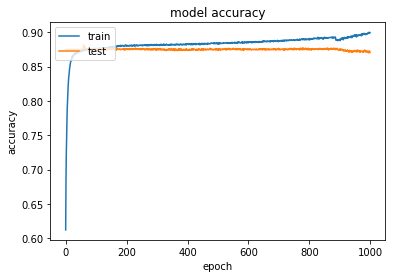

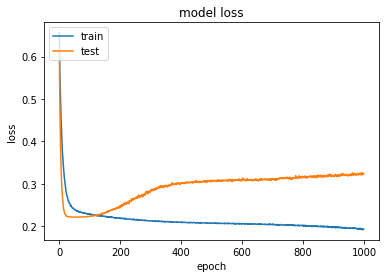

1378/1378 [==============================] - 0s 17us/step
acc: 87.17%


In [26]:
train(0.7, 1e-4)